In [72]:
import numpy as np 
import matplotlib.pyplot as plt 

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10 

In [73]:
NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)  

In [74]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(filters = 10, 
                      kernel_size = (4,4), 
                      strides = 2, 
                      padding = 'same')(input_layer)

conv_layer_2 = Conv2D(filters = 20, 
                      kernel_size = (3,3), 
                      strides = 2, 
                      padding = 'same')(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)
output_layer = Dense(units=10, activation='softmax')(flatten_layer)
model = Model(input_layer, output_layer)

In [75]:
opt = Adam(lr=0.0002)
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])

In [76]:
model.fit(x_train, 
          y_train, 
          batch_size=32, 
          epochs=10, 
          shuffle=True)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-02-19 11:25:05.754343: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 5s 3ms/step - loss: 1.9182 - accuracy: 0.3208
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7826 - accuracy: 0.3832
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7485 - accuracy: 0.3986
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7295 - accuracy: 0.4068
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7188 - accuracy: 0.4110
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7106 - accuracy: 0.4155
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7042 - accuracy: 0.4182
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6994 - accuracy: 0.4207
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6960 - accuracy: 0.4239
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6923 - accurac

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 
                    'cat','deer', 'dog', 'frog', 
                    'horse', 'ship', 'truck'])


preds = model.predict(x_test)
preds_class = CLASSES[np.argmax(preds, axis = -1)]
actual_class = CLASSES[np.argmax(y_test, axis = -1)]

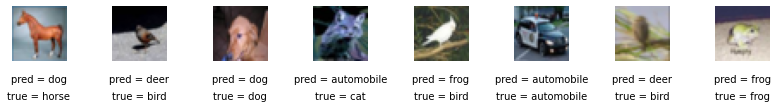

In [78]:
n_to_show = 8
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(14, 1))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.4, 'pred = ' + str(preds_class[idx]),
            fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'true = ' + str(actual_class[idx]),
            fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [26]:
from tensorflow.keras.layers import(BatchNormalization, 
                                    LeakyReLU, 
                                    Dropout, 
                                    Activation)

In [18]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, 
           kernel_size = 3 , 
           strides = 1, 
           padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, 
           kernel_size = 3, 
           strides = 2, 
           padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, 
           kernel_size = 3, 
           strides = 1, 
           padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, 
           kernel_size = 3, 
           strides = 2, 
           padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [20]:
opt = Adam(lr=0.0002)
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])

In [21]:
model.fit(x_train, 
          y_train, 
          batch_size=32, 
          epochs=10, 
          shuffle=True)

2022-02-19 08:38:08.532790: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 614400000 exceeds 10% of system memory.


Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.6773 - accuracy: 0.4204
Epoch 2/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.2837 - accuracy: 0.5456
Epoch 3/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.1076 - accuracy: 0.6130
Epoch 4/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.0068 - accuracy: 0.6488
Epoch 5/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.9356 - accuracy: 0.6757
Epoch 6/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.8739 - accuracy: 0.6947
Epoch 7/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.8300 - accuracy: 0.7117
Epoch 8/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.7837 - accuracy: 0.7263
Epoch 9/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.7478 - accuracy: 0.7385
Epoch 10/10
50

In [22]:
model.evaluate(x_test, y_test)

  256/10000 [..............................] - ETA: 6s - loss: 0.8790 - accuracy: 0.6719 

2022-02-19 09:02:39.681177: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 122880000 exceeds 10% of system memory.


10000/10000 [==============================] - 2s 240us/sample - loss: 0.8431 - accuracy: 0.7107


[0.843073811340332, 0.7107]